# DP (dynamic programming)                                                                              or this art of simplify complexity in exchange of some memory space
sources : 
https://cses.fi/book/book.pdf  
https://www.youtube.com/watch?v=YBSt1jYwVfU

## When to use ? 

__Finding an optimal solution: We want to find a solution that is as large
as possible or as small as possible.

__Counting the number of solutions: We want to calculate the total number of possible solutions.


### Coin problem

Given a set
of coin values coins = {c1, c2,..., ck} and a target sum of money n, our task is to
form the sum n using as few coins as possible.



when we pick some coins ... what is important to know/find the next one to pick ?
( important quote from :  https://www.youtube.com/watch?v=YBSt1jYwVfU ) 
only the current sum of picked ones. 1 dimension

__Finding an optimal solution :

then we can define a DP[Sum].. and iterate throw coins 
DP is the Min Number of coins to get to Sum
Sum is the sum of the coins already picked

In [1]:
Xinput = [1,2,4] # possible coin
YSum = 19 # sum we want 
# for 19 expected : 5 (4,4,4,4,2,2)

INF = 1e9+7
DP=[INF]*(YSum+1)
DP[0]= 0 # need 0 coin to get 0 sum

for s in range(YSum+1):
    for c in Xinput:
        if s-c>=0 :
            DP[s] = min(DP[s],DP[s-c]+1) 

#print(DP)
answer = DP[YSum]
print(answer)


6


__Counting the number of solutions

DP is now the number of solution forthis problem 
Sum is the same 
The recursive call must be change 

In [2]:
Xinput = [1,3,4] # possible coin
YSum = 5 # sum we want 
# for 5 .. expected : 6 ( 1+1+1+1+1 ; 1+1+3 ; 1+3+1 ; 3+1+1 ; 1+4 ; 4+1 )

DP=[0]*(YSum+1)
DP[0]= 1 # 1 possibility to get 0 sum ... Dont pick 

for s in range(YSum+1):
    for c in Xinput:
        if s-c>=0 :
            DP[s] += DP[s-c]

#print(DP)
answer = DP[YSum]
print(answer)

6


### Longest increasing subsequence :

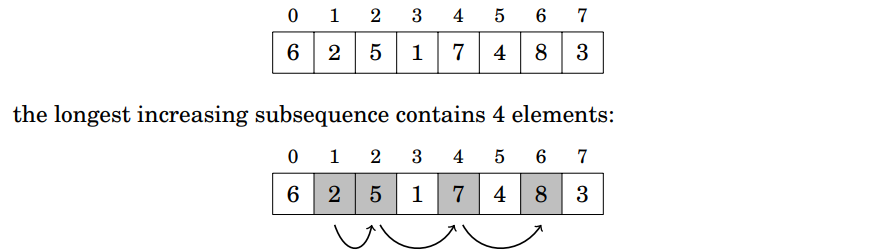

what is important to know after some pick ...

where are we ?
= > DP[i] 

DP is the longest subsequence that END at position i  
i is the index of the input array

In [3]:
Xinput = [6,2,5,1,7,4,8,3]
answer = 0 # expected 4

n = len(Xinput) 
DP=[1]*len(Xinput) # 1 length is the min (longest subsequence that end in i, the value itself)


for i in range(0,n):
    for k in range(0,i):
        #print("i:"+str(i)+ " k:"+str(k)+ " ( "+str(Xinput[i])+","+str(Xinput[k])+" ) ")
        if (Xinput[i] > Xinput[k]): # we have a greater value than the one before that we currently check -> found a longer
            #print(DP)
            DP[i] = max (DP[i], DP[k]+1) # we update by max cause maybe we did already have a better value 

print(max(DP))

4


### Path in a grid 

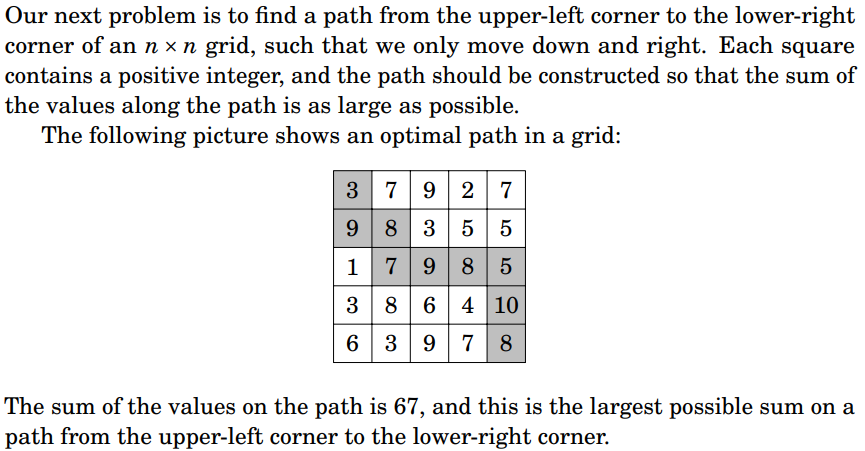

What is important after some move : 

Where are we ? i,j 
the previous path .. no need to find the next
the current sum to get better one
DP[i][j] 

DP is the MAX sum until i,j
i and j . index of the input matrix


In [4]:
def printMatrix(m):
    for r in range(len(m)):
        for c in range(len(m[0])):
            print(m[r][c],end = " ")
        print()

In [5]:
Xmatrix = [[3,7,9,2,7],[9,8,3,5,5],[1,7,9,8,5],[3,8,6,4,10],[6,3,9,7,8]]
printMatrix(Xmatrix)
n = len(Xmatrix[0])
DP=[[0]*n for i in range(n) ] # the sum can be 0 
# we dont know the next value .. so we have to recursivly use the previous sum
for i in range(n):
    for j in range(n):
        #print(i,j)
        
        if (i-1>=0 and j-1>=0):
            DP[i][j] = max(DP[i][j] , DP[i-1][j] + Xmatrix[i][j] , DP[i][j-1] + Xmatrix[i][j]) # we land on i,j from 2 possible way, we take the max
        elif i-1>=0:
            DP[i][j] = max(DP[i][j] , DP[i-1][j] + Xmatrix[i][j])
        elif j-1>=0:
            DP[i][j] = max(DP[i][j] , DP[i][j-1] + Xmatrix[i][j])
        else:
            DP[i][j] =  Xmatrix[i][j]
        #printMatrix(DP) 
        
print("")
printMatrix(DP) 

3 7 9 2 7 
9 8 3 5 5 
1 7 9 8 5 
3 8 6 4 10 
6 3 9 7 8 

3 10 19 21 28 
12 20 23 28 33 
13 27 36 44 49 
16 35 42 48 59 
22 38 51 58 67 


it is possible to make the DP working on only one line :

In [6]:
Xmatrix = [[3,7,9,2,7],[9,8,3,5,5],[1,7,9,8,5],[3,8,6,4,10],[6,3,9,7,8]]
printMatrix(Xmatrix)
n = len(Xmatrix[0])+1
DP=[[0]*n for i in range(n) ] # the sum can be 0 
# we dont know the next value .. so we have to recursivly use the previous sum
for i in range(1,n):
    for j in range(1,n):
        #print(i,j)
        DP[i][j] = max(DP[i-1][j], DP[i][j-1])+ Xmatrix[i-1][j-1]  # we land on i,j from 2 possible way, we take the max
        #printMatrix(DP) 
        
print("")
printMatrix(DP) 

3 7 9 2 7 
9 8 3 5 5 
1 7 9 8 5 
3 8 6 4 10 
6 3 9 7 8 

0 0 0 0 0 0 
0 3 10 19 21 28 
0 12 20 23 28 33 
0 13 27 36 44 49 
0 16 35 42 48 59 
0 22 38 51 58 67 


### Knapsack problems

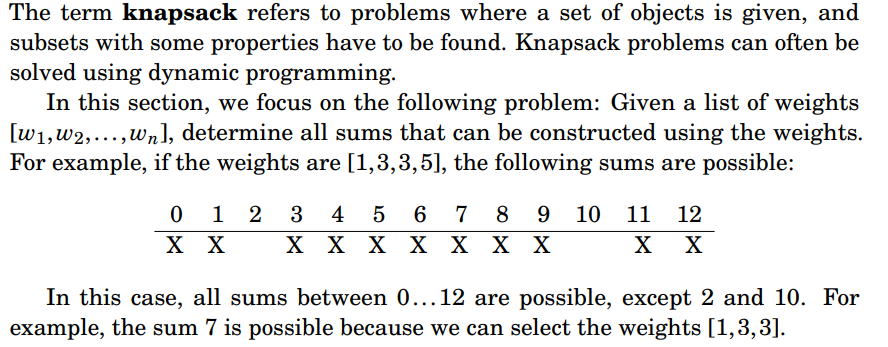

What is important after we reach some sum ?

is it possible to get there ?

What weight did we use ? hum .. increasing ? 

where are we ? 

=> DP[w][sum]
w : index of weight already checked to get to get to sum
sum : current considered sum

DP si the True/False if its possible to have the sum with the w previous weigth
if i can get to a particular sum, i can add a particular next weigth to get higher sum

In [7]:
Xinput = [0,1,3,3,5] # expected [True,True,False,True,True,True,True,True,True,True,False,True,True]
                             
                             #   0    1    2     3    4   5    6    7     8    9    10    11    12
        
n = len(Xinput)
SumTot = sum(Xinput)+1
#print(W)
DP=[[False] * (SumTot) for i in range(n) ]
#printMatrix(DP) 
DP[0][0] = True
for s in range(0,SumTot): # what sum can we reach
    for i in range(1,n): # for each weigth
        # 2 ways to get there ... we use the ith weigth or not 
        #print(i,s,"  sum we want : ", s , "weigth : " ,Xinput[i])
        if (s-Xinput[i] >= 0):
            DP[i][s] = DP[i][s] or DP[i-1][s-Xinput[i]] # if we use it ... the next sum is s-ith weight .. 
        DP[i][s]     = DP[i][s] or DP[i-1][s] # if we dont use it .. the next sum is unchanged : s
    #printMatrix(DP) 
res = []
for s in range(SumTot):
    res.append(DP[n-1][s])
print( res)


[True, True, False, True, True, True, True, True, True, True, False, True, True]


Time complexity of this algo is then O(SxN) and Space complexity is S*N but we can do better by only reasonning on one Dimension:  

In [16]:
Xinput = [1,3,3,5] # expected [True,True,False,True,True,True,True,True,True,True,False,True,True]
                             
                               #   0    1    2    3   4     5    6    7     8    9    10   11   12
        
n = len(Xinput)
SumTot = sum(Xinput)+1
#print(W)
DP=[False] * (SumTot)

DP[0] = True
for i in range(n): # for each  weigth
    for s in range(SumTot-1,0-1,-1): # DECREASING sum can we reach
        #print(s,Xinput[i])
        if (DP[s]):
            DP[s+Xinput[i]]=True
print (DP)   


[True, True, False, True, True, True, True, True, True, True, False, True, True]


### EditDistance

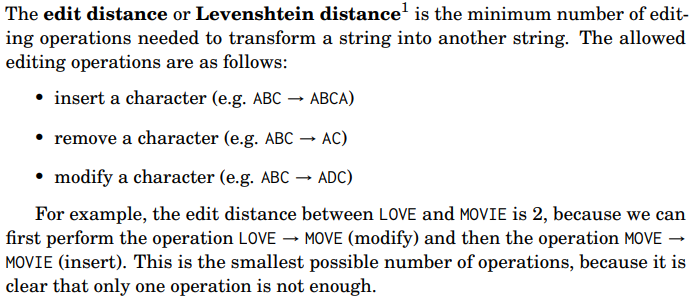

#### find the edit distance between x and y 

After some operation on strings, what is important to know ? 
what is the problem ? wht is the the subproblem witch is the same as the problem ? 
Letter before ? no 
order ? no 
Distance between letter ? yes ... Witch letter ? Prefix ? Suffix ? Substring ?
DP[i] : distance between x[0:i] and y[0:i] ? 
Hum ... maybe delete is the best option ... ( "LOVE" and "LOOVE" )
DP[i,j] ? distance between x[O:i],y[0:j]
Distance == How many move we need to get x=y (Dist ( "A" and "AAA" ) = 2)

("ABC" and "GHI" = 3)
("ABC" and "GHIJ" = 3+1) # when j+1 => distance = +1
("ABCJ" and "GHI" = 3+1) # when i +1 => dist +1 
("ABCJ" and "GHIJ" = 3+0) # when i+1,j+1 => distance depends on last letter




In [ ]:
x = "LOVE"
y = "MOVIE"


